In [113]:
import pandas as pd
from pandas import Series,DataFrame
from sklearn.utils import shuffle
import os
cwd = os.getcwd()
print(cwd)
os.chdir('C:\\Users\\G560667\\All-Data\\')
print(cwd)

C:\Users\G560667\All-Data
C:\Users\G560667\All-Data


In [114]:
# numpy, matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
print(cwd)

C:\Users\G560667\All-Data


In [216]:
df = pd.read_csv('train.csv')

df_test=pd.read_csv('test.csv')

In [ ]:
#df.describe
#df_test.describe

In [217]:
df.shape
df_test.shape

(4507, 11)

In [118]:
print(df.describe())
print(df_test.describe())

       satisfaction_level  last_evaluation_rating  projects_worked_on  \
count        25491.000000            25491.000000        25491.000000   
mean             6.137704                7.167832            4.215174   
std              2.486316                1.710754            1.324228   
min              0.900000                3.600000            2.000000   
25%              4.400000                5.600000            3.000000   
50%              6.500000                7.200000            4.000000   
75%              8.200000                8.700000            5.000000   
max             10.000000               10.000000            8.000000   

       average_montly_hours  time_spend_company  Work_accident  \
count          25491.000000        25491.000000   25491.000000   
mean             205.286846            3.497156       0.146012   
std               50.182916            1.457715       0.353125   
min               96.000000            2.000000       0.000000   
25%         

In [119]:
df.info()
#--------------------
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25491 entries, 0 to 25490
Data columns (total 10 columns):
satisfaction_level        25491 non-null float64
last_evaluation_rating    25491 non-null float64
projects_worked_on        25491 non-null int64
average_montly_hours      25491 non-null int64
time_spend_company        25491 non-null int64
Work_accident             25491 non-null int64
promotion_last_5years     25491 non-null int64
Department                25491 non-null object
salary                    25491 non-null object
Attrition                 25491 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4507 entries, 0 to 4506
Data columns (total 11 columns):
ID                        4507 non-null int64
satisfaction_level        4507 non-null float64
last_evaluation_rating    4507 non-null float64
projects_worked_on        4507 non-null int64
average_montly_hours      4507 non-null int64
time_spend_c

In [120]:
df.tail()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
25486,4.0,5.7,2,151,3,0,0,support,low,1
25487,3.7,4.8,2,160,3,0,0,support,low,1
25488,3.7,5.3,2,143,3,0,0,support,low,1
25489,1.1,9.6,6,280,4,0,0,support,low,1
25490,3.7,5.2,2,158,3,0,0,support,low,1


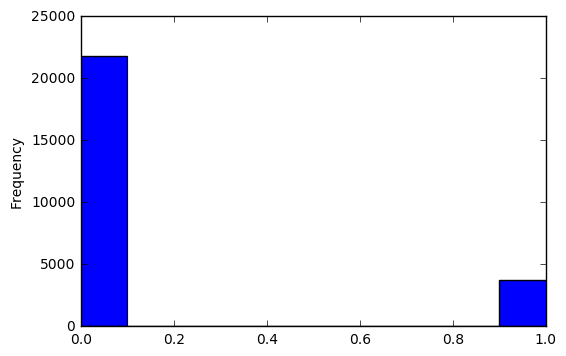

In [121]:
df['Work_accident'].plot(kind='hist')

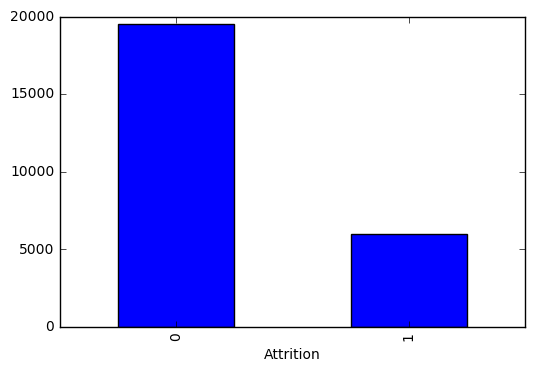

In [122]:
df.groupby('Attrition').size().plot(kind='bar')

In [123]:
import seaborn as sns

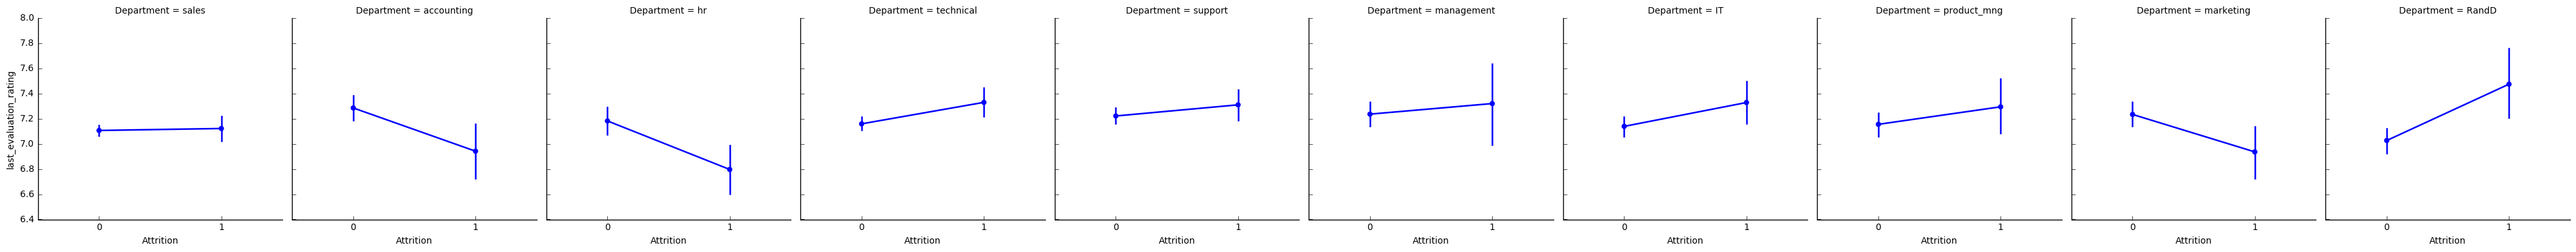

In [124]:
sns.factorplot(data=df, x="Attrition", y="last_evaluation_rating",col="Department")

C:\Users\G560667\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


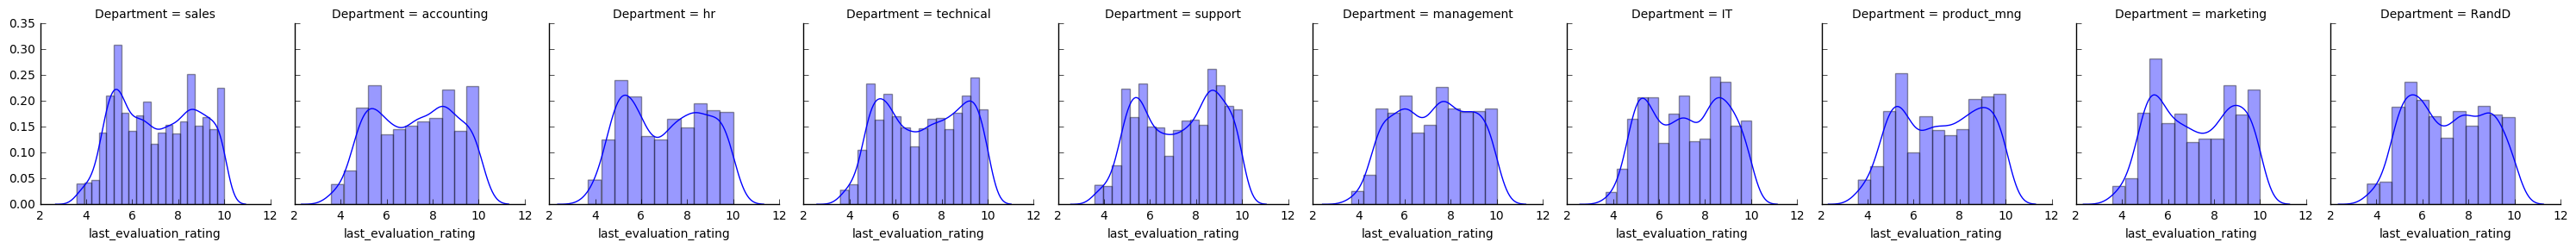

In [125]:
g = sns.FacetGrid(df, col="Department") 
g.map(sns.distplot, "last_evaluation_rating")

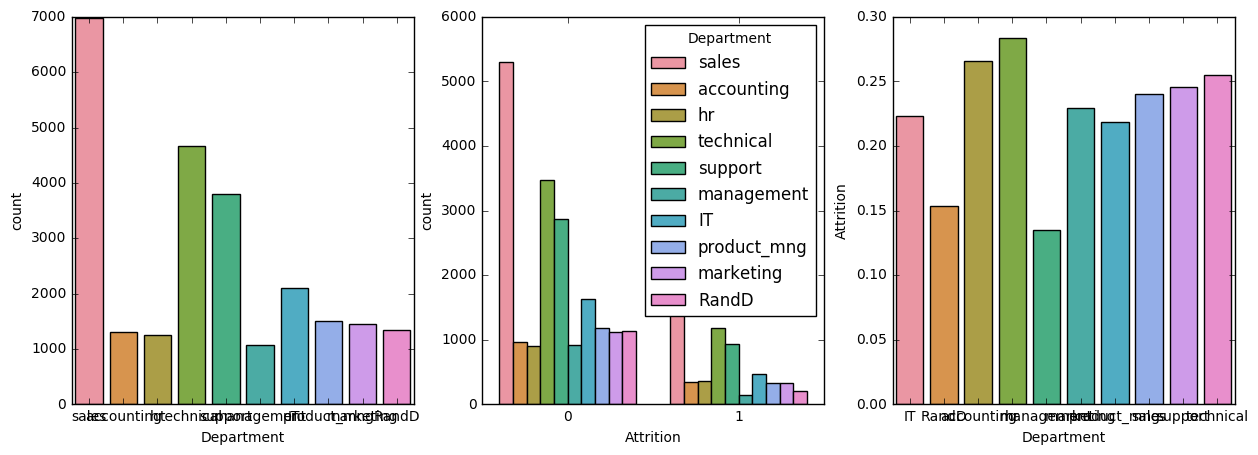

In [126]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Department', data=df, ax=ax[0])
sns.countplot(x='Attrition', hue="Department", data=df, ax=ax[1])

##Attrition By Department
Attrib = df[["Department", "Attrition"]].groupby(['Department'],as_index=False).mean()
sns.barplot(x='Department', y='Attrition', data=Attrib,ax=ax[2])
#Attrib

In [218]:
## Do it on Train and Test Set

department_dummies  = pd.get_dummies(df['Department'])
df = df.join(department_dummies)
df.drop(['Department'], axis=1,inplace=True)

department_dummies  = pd.get_dummies(df_test['Department'])
df_test = df_test.join(department_dummies)
df_test.drop(['Department'], axis=1,inplace=True)

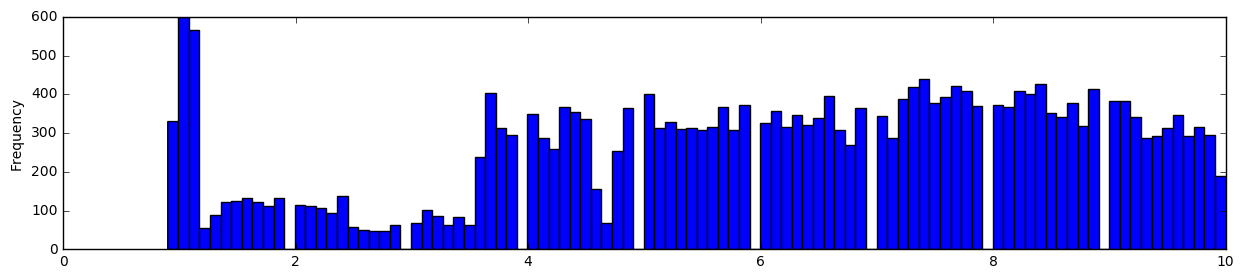

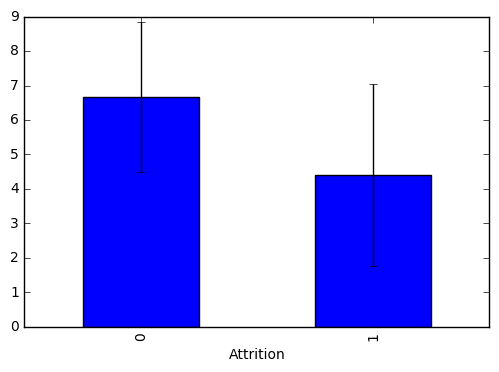

In [219]:
## satisfaction_level analysis
satisf_left= df["satisfaction_level"][df["Attrition"] == 0]
satisf_not_left = df["satisfaction_level"][df["Attrition"] == 1]

avgerage_satisf = DataFrame([satisf_left.mean(), satisf_not_left.mean()])
std_satisf      = DataFrame([satisf_left.std(), satisf_not_left.std()])

df['satisfaction_level'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,10))

avgerage_satisf.index.names = std_satisf.index.names = ["Attrition"]
avgerage_satisf.plot(yerr=std_satisf,kind='bar',legend=False)

In [220]:
## Salary Analysis

salary_dummies  = pd.get_dummies(df['salary'])
df = df.join(salary_dummies)
df.drop(['salary'], axis=1,inplace=True)

salary_dummies   = pd.get_dummies(df_test['salary'])
df_test = df_test.join(salary_dummies)
df_test.drop(['salary'], axis=1,inplace=True)

In [221]:
#promotion_last_5years

promotion_dummies  = pd.get_dummies(df['promotion_last_5years'])
df = df.join(promotion_dummies)
df.drop(['promotion_last_5years'], axis=1,inplace=True)

promotion_dummies   = pd.get_dummies(df_test['promotion_last_5years'])
df_test = df_test.join(promotion_dummies)
df_test.drop(['promotion_last_5years'], axis=1,inplace=True)

In [222]:
#Work_accident

acc_dummies  = pd.get_dummies(df['Work_accident']).rename(columns=lambda x: 'Category_' + str(x))
df = df.join(acc_dummies)
df.drop(['Work_accident'], axis=1,inplace=True)

acc_dummies   = pd.get_dummies(df_test['Work_accident']).rename(columns=lambda x: 'Category_' + str(x))
df_test = df_test.join(acc_dummies)
df_test.drop(['Work_accident'], axis=1,inplace=True)

In [132]:
df.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Attrition,IT,RandD,accounting,hr,...,sales,support,technical,high,low,medium,0,1,Category_0,Category_1
0,3.8,5.3,3,167,3,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,8.0,8.6,6,272,6,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.1,8.8,8,282,4,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,3.7,5.2,3,169,3,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4.1,5.0,3,163,3,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [52]:
#time_spend_company--DOnt do

#work_dummies  = pd.get_dummies(df['time_spend_company']).rename(columns=lambda x: 'time_spend_company_' + str(x))
#df = df.join(work_dummies)
#df.drop(['time_spend_company'], axis=1,inplace=True)

#work_dummies   = pd.get_dummies(df_test['time_spend_company']).rename(columns=lambda x: 'time_spend_company_' + str(x))
#df_test = df_test.join(work_dummies)
#df_test.drop(['time_spend_company'], axis=1,inplace=True)

In [53]:
df.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Attrition,IT,RandD,accounting,hr,...,sales,support,technical,high,low,medium,0,1,Category_0,Category_1
0,3.8,5.3,3,167,3,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,8.0,8.6,6,272,6,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.1,8.8,8,282,4,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,3.7,5.2,3,169,3,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4.1,5.0,3,163,3,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [54]:
#projects_worked_on--dont do

#project_dummies  = pd.get_dummies(df['projects_worked_on']).rename(columns=lambda x: 'projects_worked_on_' + str(x))
#df = df.join(project_dummies)
#df.drop(['projects_worked_on'], axis=1,inplace=True)

#project_dummies   = pd.get_dummies(df_test['projects_worked_on']).rename(columns=lambda x: 'projects_worked_on_' + str(x))
#df_test = df_test.join(project_dummies)
#df_test.drop(['projects_worked_on'], axis=1,inplace=True)

In [55]:
df.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Attrition,IT,RandD,accounting,hr,...,sales,support,technical,high,low,medium,0,1,Category_0,Category_1
0,3.8,5.3,3,167,3,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,8.0,8.6,6,272,6,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.1,8.8,8,282,4,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,3.7,5.2,3,169,3,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4.1,5.0,3,163,3,1,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [56]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=min_max.fit_transform(df[['satisfaction_level', 'last_evaluation_rating',
                'average_montly_hours']])
df_test_minmax=min_max.fit_transform(df_test[['satisfaction_level', 'last_evaluation_rating',
                'average_montly_hours']])

In [151]:
X_train=df.drop('Attrition', axis=1)
y_train=df['Attrition']

X_test=df_test.drop('Attrition', axis=1)
y_test=df_test['Attrition']
X_test.drop(['ID'], axis=1,inplace=True)
X_test.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,IT,RandD,accounting,hr,management,...,sales,support,technical,high,low,medium,0,1,Category_0,Category_1
0,7.2,8.7,6,233,5,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,4.5,5.4,3,145,3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,4.1,5.5,3,158,3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3.6,5.6,3,147,3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4.5,4.7,3,170,3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import operator

In [141]:
import platform
print(platform.python_version())

3.5.2


In [153]:
y_train.shape

(25491,)

[0]	train-logloss:0.585236	eval-logloss:0.585818
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 50 rounds.
[1]	train-logloss:0.5131	eval-logloss:0.514103
[2]	train-logloss:0.461755	eval-logloss:0.462573
[3]	train-logloss:0.424145	eval-logloss:0.42513
[4]	train-logloss:0.395902	eval-logloss:0.396662
[5]	train-logloss:0.373722	eval-logloss:0.373908
[6]	train-logloss:0.348529	eval-logloss:0.348499
[7]	train-logloss:0.332648	eval-logloss:0.332669
[8]	train-logloss:0.319348	eval-logloss:0.318883
[9]	train-logloss:0.305404	eval-logloss:0.30502
[10]	train-logloss:0.294937	eval-logloss:0.294298
[11]	train-logloss:0.285835	eval-logloss:0.285056
[12]	train-logloss:0.272906	eval-logloss:0.271448
[13]	train-logloss:0.266143	eval-logloss:0.264728
[14]	train-logloss:0.259487	eval-logloss:0.25781
[15]	train-logloss:0.250994	eval-logloss:0.248983
[16]	train-logloss:0.24515	eval-logloss:0.24273
[17]	train-logloss

ValueError: No such file: xgb.fmap

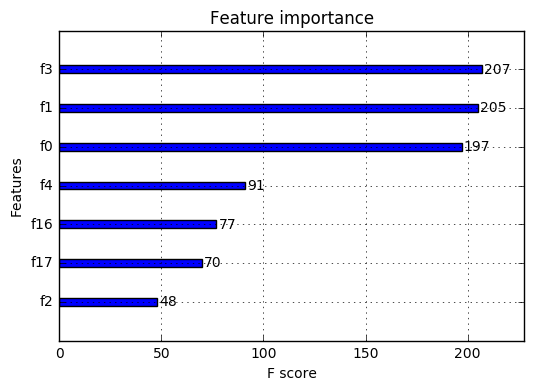

In [154]:
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=4242)
import xgboost as xgb
dtrain = xgb.DMatrix(np.array(x_train), label=y_train)
dval=xgb.DMatrix(np.array(x_val),label=y_val)
dtest = xgb.DMatrix(np.array(X_test))

xgb_params = {
    'seed': 7,
    # 'colsample_bytree': 0.7,
    'silent': 0,
    # 'subsample': 0.7,
    'learning_rate': 0.2,
    'objective': 'binary:logistic',
    'max_depth': 3,
    # 'num_parallel_tree': 1,
    'min_child_weight': 500,
    'eval_metric': 'logloss',
    
}
num_round=800
watchlist=[(dtrain,'train'),(dval,'eval')]

gbdt = xgb.train(xgb_params, dtrain,num_round,watchlist,early_stopping_rounds=50)
xgb.plot_importance(gbdt)
# gbdt=gbdt
importance = gbdt.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))
print (importance)
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()
# print df
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False)
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')


In [157]:
p_test = gbdt.predict(dtest)
submission = pd.DataFrame({
        "ID": df_test['ID'],
        "Attrition":p_test
        
    })
submission
submission = submission[["ID","Attrition"]] 
submission.to_csv('submission_xg_boost_pp.csv', index=False,cols=["ID","Attrition"])

In [158]:
p_test

array([ 0.76269102,  0.88780618,  0.89858633, ...,  0.82040703,
        0.8695091 ,  0.80411899], dtype=float32)

In [ ]:
submission = pd.DataFrame({
        "ID": df_test['ID'],
        "Attrition":p_test
        
    })
submission

In [160]:
est

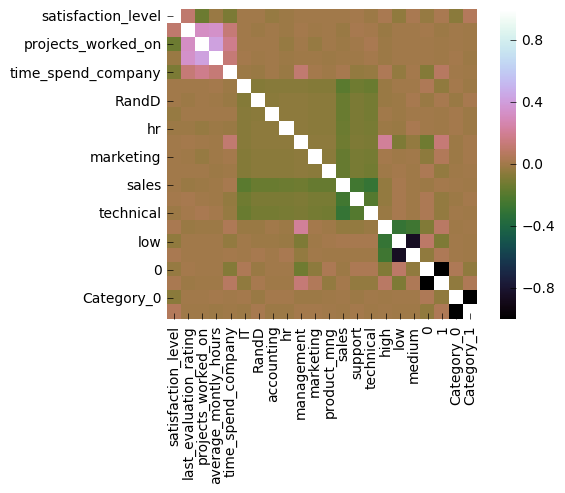

In [175]:
corr=X_train.corr()
corr
sns.heatmap(corr, vmax=1, square=True,cmap='cubehelix')

In [210]:
from sklearn import preprocessing as pp

def PolynomialFeatures_labeled(input_df,power):
    '''Basically this is a cover for the sklearn preprocessing function. 
    The problem with that function is if you give it a labeled dataframe, it ouputs an unlabeled dataframe with potentially
    a whole bunch of unlabeled columns. 

    Inputs:
    input_df = Your labeled pandas dataframe (list of x's not raised to any power) 
    power = what order polynomial you want variables up to. 
    (use the same power as you want entered into pp.PolynomialFeatures(power) directly)

    Ouput:
    Output: This function relies on the powers_ matrix which is one of the preprocessing function's outputs to create logical labels and 
    outputs a labeled pandas dataframe   
    '''
    poly = pp.PolynomialFeatures(power)
    output_nparray = poly.fit_transform(input_df)
    powers_nparray = poly.powers_

    input_feature_names = list(input_df.columns)
    input_feature_names=['satisfaction_level','last_evaluation_rating']
    #,'projects_worked_on','time_spend_company'
    target_feature_names = ["Constant Term"]
    for feature_distillation in powers_nparray[1:]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(input_feature_names)):
            if feature_distillation[i] == 0:
                continue
            else:
                variable = input_feature_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s^%d" % (variable,power)
                if final_label == "":         #If the final label isn't yet specified
                    final_label = intermediary_label
                else:
                    final_label = final_label + " x " + intermediary_label
        target_feature_names.append(final_label)
    output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
    return output_df

train_output_df = PolynomialFeatures_labeled(df,3)
train_output_df.head()
test_output_df = PolynomialFeatures_labeled(df_test,3)
test_output_df.head()

#train_output_df.shape
test_output_df.shape

(4507, 2925)

In [227]:
X_train=df.drop('Attrition', axis=1)
y_train=df['Attrition']

X_test=df_test.drop('Attrition', axis=1)
y_test=df_test['Attrition']
X_test.drop(['ID'], axis=1,inplace=True)
X_test.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,IT,RandD,accounting,hr,management,...,sales,support,technical,high,low,medium,0,1,Category_0,Category_1
0,7.2,8.7,6,233,5,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,4.5,5.4,3,145,3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,4.1,5.5,3,158,3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3.6,5.6,3,147,3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4.5,4.7,3,170,3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
poly = pp.PolynomialFeatures(4)
df_X = poly.fit_transform(X_train)
df_y = poly.fit_transform(X_test)

features = ['satisfaction_level','last_evaluation_rating']

print(poly.powers_)

for entry in poly.powers_:
    newFeature = []
    for feat, coef in zip(features, entry):
        if coef > 0:
            newFeature.append(feat+'**'+str(coef))
    if not newFeature:
        print(1) # If all powers are 0
    else:
        print(' + '.join(newFeature))

In [230]:
df_y.shape
#df_Test.shape

(4507, 14950)

[0]	train-logloss:0.575003	eval-logloss:0.574059
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 50 rounds.
[1]	train-logloss:0.495115	eval-logloss:0.493863
[2]	train-logloss:0.435099	eval-logloss:0.435137
[3]	train-logloss:0.389195	eval-logloss:0.388175
[4]	train-logloss:0.353694	eval-logloss:0.351988
[5]	train-logloss:0.322386	eval-logloss:0.319922
[6]	train-logloss:0.298459	eval-logloss:0.29591
[7]	train-logloss:0.278961	eval-logloss:0.275791
[8]	train-logloss:0.262538	eval-logloss:0.258669
[9]	train-logloss:0.249236	eval-logloss:0.245534
[10]	train-logloss:0.232027	eval-logloss:0.227255
[11]	train-logloss:0.223417	eval-logloss:0.218557
[12]	train-logloss:0.211928	eval-logloss:0.206529
[13]	train-logloss:0.20555	eval-logloss:0.200358
[14]	train-logloss:0.200642	eval-logloss:0.194858
[15]	train-logloss:0.197702	eval-logloss:0.191559
[16]	train-logloss:0.193634	eval-logloss:0.187031
[17]	train-lo

ValueError: No such file: xgb.fmap

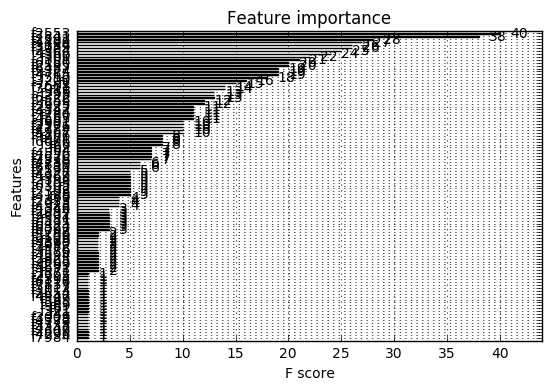

In [231]:
x_train, x_val, y_train, y_val = train_test_split(df_X, y_train, test_size=0.2, random_state=4242)
import xgboost as xgb
dtrain = xgb.DMatrix(np.array(x_train), label=y_train)
dval=xgb.DMatrix(np.array(x_val),label=y_val)
dtest = xgb.DMatrix(np.array(df_y))

xgb_params = {
    'seed': 7,
    # 'colsample_bytree': 0.7,
    'silent': 0,
    # 'subsample': 0.7,
    'learning_rate': 0.2,
    'objective': 'binary:logistic',
    'max_depth': 3,
    # 'num_parallel_tree': 1,
    'min_child_weight': 500,
    'eval_metric': 'logloss',
    
}
num_round=800
watchlist=[(dtrain,'train'),(dval,'eval')]

gbdt = xgb.train(xgb_params, dtrain,num_round,watchlist,early_stopping_rounds=50)
xgb.plot_importance(gbdt)
# gbdt=gbdt
importance = gbdt.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))
print (importance)
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()
# print df
plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False)
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

In [235]:
# Use PolynomialFeatures in sklearn.preprocessing to create two-way interactions for all features
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all 0 values            
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)
    
    return df

In [248]:
X_train=df.drop('Attrition', axis=1)
y_train=df['Attrition']

X_test=df_test.drop('Attrition', axis=1)
y_test=df_test['Attrition']
X_test.drop(['ID'], axis=1,inplace=True)
#X_train.head()

X_test_final=df_test.drop('Attrition', axis=1)
y_test_final=df_test['Attrition']
X_test_final.drop(['ID'], axis=1,inplace=True)

#X_train.rename(columns={0: 'type_0', 1: 'type_1'}, inplace=True)
X_test_final.rename(columns={0: 'type_0', 1: 'type_1'}, inplace=True)


,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,IT,RandD,accounting,hr,management,...,sales,support,technical,high,low,medium,type_0,type_1,Category_0,Category_1
0,3.8,5.3,3,167,3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,8.0,8.6,6,272,6,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.1,8.8,8,282,4,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,3.7,5.2,3,169,3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4.1,5.0,3,163,3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [281]:
X_test_final=df_test.drop('Attrition', axis=1)
y_test_final=df_test['Attrition']
X_test_final.drop(['ID'], axis=1,inplace=True)

#X_train.rename(columns={0: 'type_0', 1: 'type_1'}, inplace=True)
X_test_final.rename(columns={0: 'type_0', 1: 'type_1'}, inplace=True)

In [249]:
X_tr_mod = add_interactions(X_train)
print(X_tr_mod.head(5))

   satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                 3.0   
1                 8.0                     8.6                 6.0   
2                 1.1                     8.8                 8.0   
3                 3.7                     5.2                 3.0   
4                 4.1                     5.0                 3.0   

   average_montly_hours  time_spend_company   IT  RandD  accounting   hr  \
0                 167.0                 3.0  0.0    0.0         0.0  0.0   
1                 272.0                 6.0  0.0    0.0         0.0  0.0   
2                 282.0                 4.0  0.0    0.0         0.0  0.0   
3                 169.0                 3.0  0.0    0.0         0.0  0.0   
4                 163.0                 3.0  0.0    0.0         0.0  0.0   

   management        ...          low_Category_0  low_Category_1  \
0         0.0        ...                     1.0            

In [250]:
X_te_mod = add_interactions(X_test)
print(X_te_mod.head(5))

   satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 7.2                     8.7                 6.0   
1                 4.5                     5.4                 3.0   
2                 4.1                     5.5                 3.0   
3                 3.6                     5.6                 3.0   
4                 4.5                     4.7                 3.0   

   average_montly_hours  time_spend_company   IT  RandD  accounting   hr  \
0                 233.0                 5.0  0.0    0.0         0.0  0.0   
1                 145.0                 3.0  0.0    0.0         0.0  0.0   
2                 158.0                 3.0  0.0    0.0         0.0  0.0   
3                 147.0                 3.0  0.0    0.0         0.0  0.0   
4                 170.0                 3.0  0.0    0.0         0.0  0.0   

   management        ...          low_Category_0  low_Category_1  \
0         0.0        ...                     1.0            

In [282]:
X_test_mod = add_interactions(X_test_final)
print(X_test_mod.head(5))

   satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 7.2                     8.7                 6.0   
1                 4.5                     5.4                 3.0   
2                 4.1                     5.5                 3.0   
3                 3.6                     5.6                 3.0   
4                 4.5                     4.7                 3.0   

   average_montly_hours  time_spend_company   IT  RandD  accounting   hr  \
0                 233.0                 5.0  0.0    0.0         0.0  0.0   
1                 145.0                 3.0  0.0    0.0         0.0  0.0   
2                 158.0                 3.0  0.0    0.0         0.0  0.0   
3                 147.0                 3.0  0.0    0.0         0.0  0.0   
4                 170.0                 3.0  0.0    0.0         0.0  0.0   

   management        ...          low_Category_0  low_Category_1  \
0         0.0        ...                     1.0            

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pd.DataFrame(pca.fit_transform(X))
print(X_pca.head(5))
##PCA

In [260]:
X_te_mod.shape
y_Train=df['Attrition']
y_Test=df_test['Attrition']

In [263]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tr_mod, y_Train, train_size=0.80, random_state=1)
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)


In [264]:
indices_selected 

array([  0,  20,  21,  22,  23,  24,  38,  39,  41,  42,  45,  63,  64,
        82,  98, 111, 113, 115, 192, 198], dtype=int64)

In [283]:
colnames_selected = [X_tr_mod.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]
X_test_selec=X_test_mod[colnames_selected]
print(colnames_selected)

['satisfaction_level', 'Category_0', 'Category_1', 'satisfaction_level_last_evaluation_rating', 'satisfaction_level_projects_worked_on', 'satisfaction_level_average_montly_hours', 'satisfaction_level_medium', 'satisfaction_level_type_0', 'satisfaction_level_Category_0', 'satisfaction_level_Category_1', 'last_evaluation_rating_time_spend_company', 'projects_worked_on_average_montly_hours', 'projects_worked_on_time_spend_company', 'average_montly_hours_time_spend_company', 'average_montly_hours_Category_0', 'time_spend_company_low', 'time_spend_company_type_0', 'time_spend_company_Category_0', 'low_Category_0', 'type_0_Category_0']


In [266]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

##Logistic Regression



logreg = LogisticRegression()
logreg.fit(X_train_selected, y_train)
Y_pred = logreg.predict(X_test_selected)
#logreg.score(X_train, y_train)
## Logistics Regression without Scaling --78.75% Training Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_selected, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [268]:
##KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_selected, y_train)
Y_pred = knn.predict(X_test_selected)
print('Accuracy of KNN on test set: {:.4f}'.format(knn.score(X_test_selected, y_test)))

Accuracy of KNN on test set: 0.9623


In [275]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_selected, y_train)
Y_pred = random_forest.predict(X_test_selected)
print('Accuracy of random_forest on test set: {:.4f}'.format(random_forest.score(X_test_selected, y_test)))

Accuracy of random_forest on test set: 0.9910


In [284]:
def max_value(inputlist):
    return ([sublist[-1] for sublist in inputlist])

#print (max_value(Y_pred_proba))
Y_pred_proba_k = max_value(random_forest.predict_proba(X_test_selec))
submission = pd.DataFrame({
        "ID": df_test['ID'],
        "Attrition":Y_pred_proba_k  
        
    })
submission
submission = submission[["ID","Attrition"]] 
submission.to_csv('submission_xg_boost_rf_pp.csv', index=False,cols=["ID","Attrition"])

In [ ]:
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold)
print(results.mean())

In [233]:
p_test = gbdt.predict(dtest)
p_test.shape

(4507,)

In [234]:
submission = pd.DataFrame({
        "ID": df_test['ID'],
        "Attrition":p_test
        
    })
submission
submission = submission[["ID","Attrition"]] 
submission.to_csv('submission_xg_boost_pp1.csv', index=False,cols=["ID","Attrition"])

In [58]:
from sklearn.preprocessing import scale
df_scale=scale(X_train)
df_test_scale=scale(X_test)

In [59]:
X_train.head()
#X_test.shape
X_train.columns

Index([    'satisfaction_level', 'last_evaluation_rating',
           'projects_worked_on',   'average_montly_hours',
           'time_spend_company',                     'IT',
                        'RandD',             'accounting',
                           'hr',             'management',
                    'marketing',            'product_mng',
                        'sales',                'support',
                    'technical',                   'high',
                          'low',                 'medium',
                              0,                        1,
                   'Category_0',             'Category_1'],
      dtype='object')

In [162]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

##Logistic Regression

X_train=df.drop('Attrition', axis=1)
y_train=df['Attrition']

X_test=df_test.drop('Attrition', axis=1)
y_test=df_test['Attrition']
X_test.drop(['ID'], axis=1,inplace=True)
X_test.head()

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_train, y_train)
## Logistics Regression without Scaling --78.75% Training Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [163]:
#Accuracy slightly improved with Scaling
logreg = LogisticRegression()
logreg.fit(df_scale, y_train)
Y_pred = logreg.predict(X_test)
#logreg.score(df_scale, y_train)
## Logistics Regression without Scaling --78.75% Training Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(df_test_scale, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [164]:
# Support Vector Machines
svc = SVC()
svc.fit(df_scale, y_train)
Y_pred = svc.predict(X_test)
print('Accuracy of SVC classifier on test set: {:.2f}'.format(svc.score(df_test_scale, y_test)))

## Accuracy 95%

Accuracy of SVC classifier on test set: 0.95


In [165]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(df_scale, y_train)
Y_pred = random_forest.predict(X_test)
print('Accuracy of random_forest on test set: {:.2f}'.format(random_forest.score(df_test_scale, y_test)))

## Accuracy 97%

Accuracy of random_forest on test set: 0.97


In [166]:
##KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(df_scale, y_train)
Y_pred = knn.predict(X_test)
print('Accuracy of KNN on test set: {:.2f}'.format(knn.score(df_test_scale, y_test)))

##Accuracy 98%

Accuracy of KNN on test set: 0.98


In [170]:

submission = pd.DataFrame({
        "ID": df_test['ID'],
        "Attrition": max_value(Y_pred_proba_k)
        
    })
Y_pred_proba_k
submission.head()

[0.93571428571428572, 1.0, 1.0, 0.99142857142857144, 0.97428571428571431, 1.0, 0.59571428571428575, 1.0, 0.99857142857142855, 1.0, 1.0, 0.99714285714285711, 1.0, 0.99714285714285711, 1.0, 1.0, 0.92714285714285716, 1.0, 1.0, 1.0, 0.99857142857142855, 0.97714285714285709, 0.99857142857142855, 0.99857142857142855, 0.97285714285714286, 0.99857142857142855, 0.99428571428571433, 0.49428571428571427, 0.99571428571428566, 1.0, 0.79142857142857148, 0.99285714285714288, 1.0, 0.99857142857142855, 1.0, 0.93000000000000005, 0.81142857142857139, 0.99142857142857144, 0.99857142857142855, 0.99428571428571433, 0.40000000000000002, 0.99857142857142855, 1.0, 0.9871428571428571, 0.30285714285714288, 1.0, 0.98142857142857143, 0.98428571428571432, 0.99571428571428566, 0.98999999999999999, 0.99714285714285711, 0.99857142857142855, 0.95999999999999996, 1.0, 1.0, 1.0, 1.0, 0.99857142857142855, 0.9642857142857143, 1.0, 1.0, 0.98999999999999999, 1.0, 0.99571428571428566, 0.99285714285714288, 0.94142857142857139,

,Attrition,ID
0,0.935714,1
1,1.000000,2
2,1.000000,3
3,0.991429,4
4,0.974286,5


In [171]:
submission = submission[["ID","Attrition"]] 
submission.to_csv('submission_knn.csv', index=False,cols=["ID","Attrition"])

In [66]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(df_scale, y_train)
Y_pred = gaussian.predict(X_test)
print('Accuracy of Gaussian Naive Bayes on test set: {:.2f}'.format(gaussian.score(df_test_scale, y_test)))

##Accuracy 50%

Accuracy of Gaussian Naive Bayes on test set: 0.50


In [67]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(df.columns)
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,satisfaction_level,-1.004650
1,last_evaluation_rating,0.098953
2,projects_worked_on,-0.363422
3,average_montly_hours,0.228856
4,time_spend_company,0.387583
5,Attrition,-0.028490
6,IT,-0.114764
7,RandD,0.017700
8,accounting,0.064333
9,hr,-0.090614


In [ ]:
##need to work

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
import numpy as np
import pandas as pd
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score



##Join test and Train

#df_merge=pd.append([df_scale, df_test_scale])
#y_merge=pd.concat([X_test, y_test])
df_merge = X_train.append(X_test, ignore_index=True)
df_merge=scale(df_merge)

numFolds = 10
kf = KFold(len(df_merge), numFolds, shuffle=True)

# These are "Class objects". For each Class, find the AUC through
# 10 fold cross validation.
Models = [LogisticRegression, SGDClassifier]
params = [{}, {"loss": "log", "penalty": "l2", 'n_iter':1000}]
for param, Model in zip(params, Models):
    total = 0
    for train_indices, test_indices in kf:
        train_X = df_merge[train_indices, :]; train_Y = df_merge[train_indices]
        test_X = df_merge[test_indices, :]; test_Y = df_merge[test_indices]

        reg = Model(**param)
        reg.fit(train_X, train_Y)
        predictions = reg.predict(test_X)
        total += accuracy_score(test_Y, predictions)
    accuracy = total / numFolds
    print ("Accuracy score of {0}: {1}".format(Model.__name__, accuracy))

In [ ]:
kf = KFold(len(df_merge), numFolds, shuffle=True)
kf

In [68]:
from sklearn.preprocessing import scale
df_scale=scale(X_train)
df_test_scale=scale(X_test)

In [71]:
#df_cv=pd.DataFrame(df_scale)
#df_test_cv=pd.DataFrame(df_scale)

In [83]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
X = X_train
y = y_train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print ('\n',CV_rfc.best_params_)


 {'n_estimators': 700, 'max_features': 'auto'}


In [84]:
Y_pred = CV_rfc.predict(X_test)
print('Accuracy of random_forest on test set: {:.2f}'.format(CV_rfc.score(X_test, y_test)))

Accuracy of random_forest on test set: 0.99


In [88]:
X_test=df_test.drop('Attrition', axis=1)
y_test=df_test['Attrition']
X_test.drop(['ID'], axis=1,inplace=True)
X_test.head()
Y_pred = CV_rfc.predict(X_test)
print('Accuracy of random_forest on test set: {:.2f}'.format(CV_rfc.score(X_test, y_test)))
#Random forest with 200 estimators accuracy 0.99

Accuracy of random_forest on test set: 0.99


In [91]:
Y_pred_proba = CV_rfc.predict_proba(X_test)

In [92]:
Y_pred_proba

array([[ 0.06428571,  0.93571429],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       ..., 
       [ 0.01857143,  0.98142857],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ]])

In [ ]:
submission = pd.DataFrame({
        "ID": df_test['ID'],
        "Attrition": max_value(Y_pred_proba)
        
    })
submission

In [ ]:
def max_value(inputlist):
    return ([sublist[-1] for sublist in inputlist])

print (max_value(Y_pred_proba))
Y_pred_proba = CV_rfc.predict_proba(X_test)
submission = pd.DataFrame({
        "ID": df_test['ID'],
        "Attrition": max_value(Y_pred_proba)
        
    })
submission

In [112]:
submission = submission[["ID","Attrition"]] 
submission.to_csv('submission.csv', index=False,cols=["ID","Attrition"])